In [19]:
from pymongo import MongoClient
from bson.objectid import ObjectId
import altair as alt
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [20]:
client = MongoClient('192.168.178.25', 27017)
db = client.TFE
collection = db.results

# Analyse des résultats de tout les modèles en faisant varier le number de features de TF-IDF
- experiment_id 24: sans SMOTE
- experiment_id 25 : avec SMOTE

# Analysis of results without SMOTE

In [21]:
results = pd.DataFrame(columns = ['model', 'max_features', 'type', 'recall', 'precision', 'f1'])
for result in collection.find({'experiment_id' : 24}, {'report' : 1, '_id' : 0, 'max_features' : 1, 'smote' : 1, 'downsampling' : 1}):
    for model in result['report']:
        results = results.append({'model' : model['model'], 'type' : 'fake', 'recall' : model['classification_report']['fake']['recall'], 'precision' : model['classification_report']['fake']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)
        results = results.append({'model' : model['model'], 'type' : 'reliable', 'recall' : model['classification_report']['reliable']['recall'], 'precision' : model['classification_report']['reliable']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)

In [22]:
results

,model,max_features,type,recall,precision,f1
0,LinearSVC,2500,fake,0.809004,0.847814,0.915742
1,LinearSVC,2500,reliable,0.951947,0.937742,0.915742
2,MultinomialNB,2500,fake,0.487700,0.674531,0.803251
3,MultinomialNB,2500,reliable,0.922132,0.844712,0.803251
4,DecisionTreeClassifier,2500,fake,0.739557,0.748942,0.873340
5,DecisionTreeClassifier,2500,reliable,0.917966,0.914175,0.873340
6,RidgeClassifier,2500,fake,0.743734,0.855513,0.902741
7,RidgeClassifier,2500,reliable,0.958436,0.918715,0.902741
8,LinearSVC,5000,fake,0.844628,0.871319,0.929990
9,LinearSVC,5000,reliable,0.958724,0.949103,0.929990


In [23]:
fp = open('tab.tex', 'w')
results.to_latex(fp)
fp.close()

In [24]:
#results['max_features'] = results['max_features'].apply(lambda x: math.log10(x))

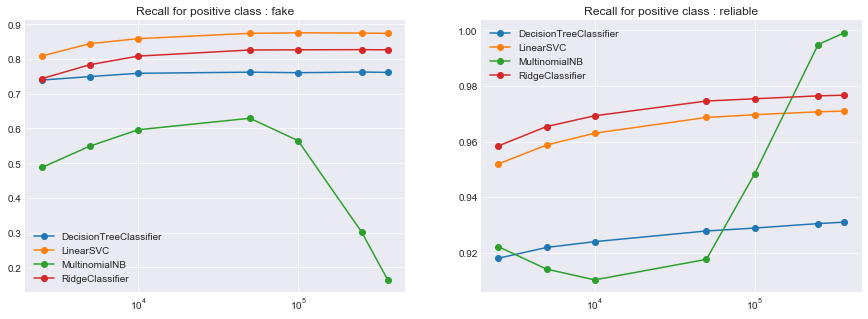

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
for key, grp in results[results['type'] == 'fake'].groupby(['model']):
    axes[0].set_xscale("log", nonposx='clip')
    axes[0].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[0].set_title('Recall for positive class : fake')
    #axes[0].xscale('log')
    axes[0].legend()

for key, grp in results[results['type'] == 'reliable'].groupby(['model']):
    axes[1].set_xscale("log", nonposx='clip')
    axes[1].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[1].set_title('Recall for positive class : reliable')
    #axes[1].xscale('log')
    axes[1].legend()
plt.savefig('output/ML_fake_recall.pdf')

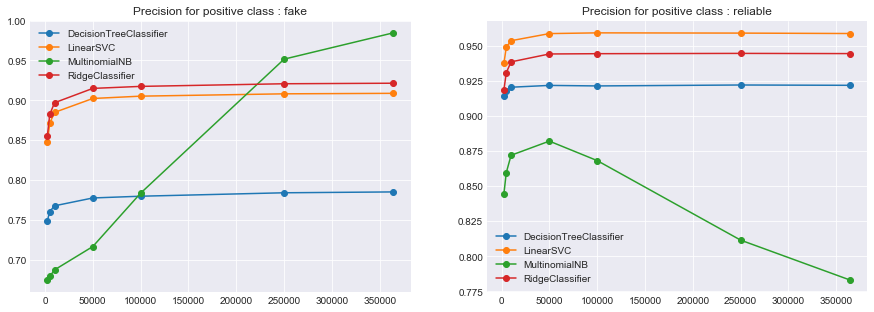

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
for key, grp in results[results['type'] == 'fake'].groupby(['model']):
    axes[0].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[0].set_title('Precision for positive class : fake')
    #axes[0].xscale('log')
    axes[0].legend()

for key, grp in results[results['type'] == 'reliable'].groupby(['model']):
    axes[1].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[1].set_title('Precision for positive class : reliable')
    #axes[1].xscale('log')
    axes[1].legend()
plt.savefig('output/ML_fake_precision.pdf')

In [27]:
results = pd.DataFrame(columns = ['model', 'recall', 'precision', 'max_features', 'f1'])
for result in collection.find({'experiment_id' : 24}, {'report' : 1, '_id' : 0, 'max_features' : 1, 'smote' : 1, 'downsampling' : 1}):
    for model in result['report']:
        results = results.append({'model' : model['model'], 'recall' : model['classification_report']['weighted avg']['recall'], 'precision' : model['classification_report']['weighted avg']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)

In [28]:
results

,model,recall,precision,max_features,f1
0,LinearSVC,0.916407,0.915384,2500,0.915742
1,MultinomialNB,0.814119,0.802400,2500,0.803251
2,DecisionTreeClassifier,0.873608,0.873093,2500,0.873340
3,RidgeClassifier,0.905055,0.903001,2500,0.902741
4,LinearSVC,0.930356,0.929764,5000,0.929990
5,MultinomialNB,0.823366,0.814784,5000,0.816749
6,DecisionTreeClassifier,0.879046,0.878495,5000,0.878758
7,RidgeClassifier,0.920258,0.918906,5000,0.918626
8,LinearSVC,0.937121,0.936619,10000,0.936806
9,MultinomialNB,0.832150,0.826076,10000,0.828008


In [29]:
fp = open('tab.tex', 'w')
results.to_latex(fp)
fp.close()

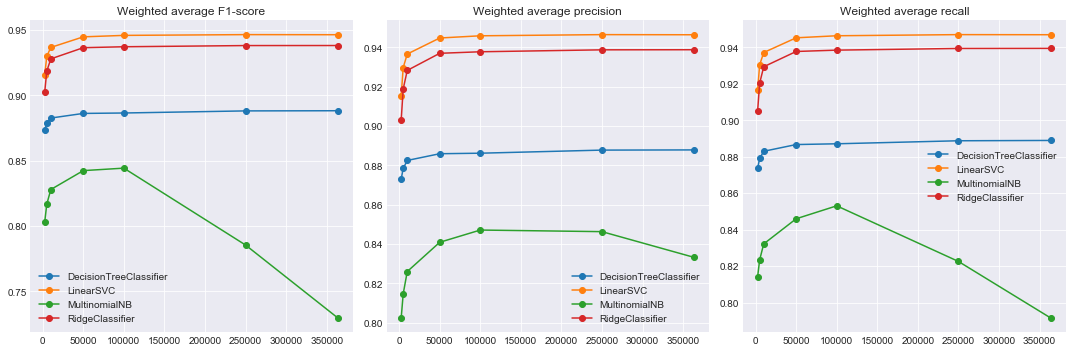

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
for key, grp in results.groupby(['model']):
    axes[0].plot(grp['max_features'], grp['f1'], label=key, marker='o')
    axes[0].set_title('Weighted average F1-score')
    #axes[0].xscale('log')
    axes[0].legend()
    axes[1].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[1].set_title('Weighted average precision')
    #axes[0].xscale('log')
    axes[1].legend()
    axes[2].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[2].set_title('Weighted average recall')
    #axes[0].xscale('log')
    axes[2].legend()
plt.tight_layout()
plt.savefig('output/ML_fake_average.pdf')

# Analysis of the results with SMOTE

In [31]:
results = pd.DataFrame(columns = ['model', 'type', 'recall', 'precision', 'max_features', 'f1'])
for result in collection.find({'experiment_id' : 25}, {'report' : 1, '_id' : 0, 'max_features' : 1, 'smote' : 1, 'downsampling' : 1}):
    for model in result['report']:
        results = results.append({'model' : model['model'], 'type' : 'fake', 'recall' : model['classification_report']['fake']['recall'], 'precision' : model['classification_report']['fake']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)
        results = results.append({'model' : model['model'], 'type' : 'reliable', 'recall' : model['classification_report']['reliable']['recall'], 'precision' : model['classification_report']['reliable']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)

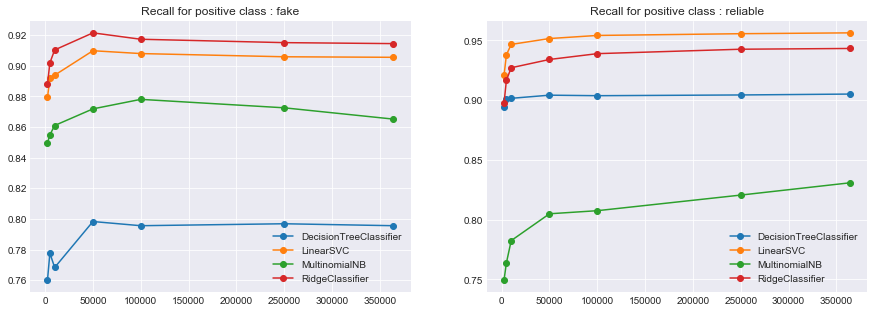

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
for key, grp in results[results['type'] == 'fake'].groupby(['model']):
    axes[0].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[0].set_title('Recall for positive class : fake')
    #axes[0].xscale('log')
    axes[0].legend()

for key, grp in results[results['type'] == 'reliable'].groupby(['model']):
    axes[1].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[1].set_title('Recall for positive class : reliable')
    #axes[1].xscale('log')
    axes[1].legend()
plt.savefig('output/ML_SMOTE_fake_recall.pdf')

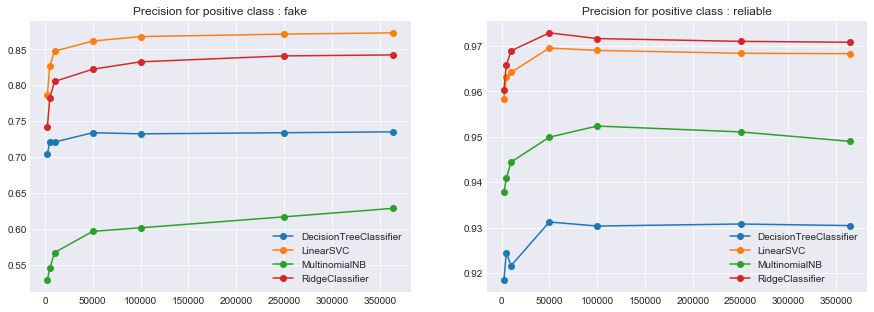

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
for key, grp in results[results['type'] == 'fake'].groupby(['model']):
    axes[0].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[0].set_title('Precision for positive class : fake')
    #axes[0].xscale('log')
    axes[0].legend()

for key, grp in results[results['type'] == 'reliable'].groupby(['model']):
    axes[1].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[1].set_title('Precision for positive class : reliable')
    #axes[1].xscale('log')
    axes[1].legend()
plt.savefig('output/ML_SMOTE_fake_precision.pdf')

In [34]:
results = pd.DataFrame(columns = ['model', 'recall', 'precision', 'max_features', 'f1'])
for result in collection.find({'experiment_id' : 25}, {'report' : 1, '_id' : 0, 'max_features' : 1, 'smote' : 1, 'downsampling' : 1}):
    for model in result['report']:
        results = results.append({'model' : model['model'], 'recall' : model['classification_report']['weighted avg']['recall'], 'precision' : model['classification_report']['weighted avg']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)

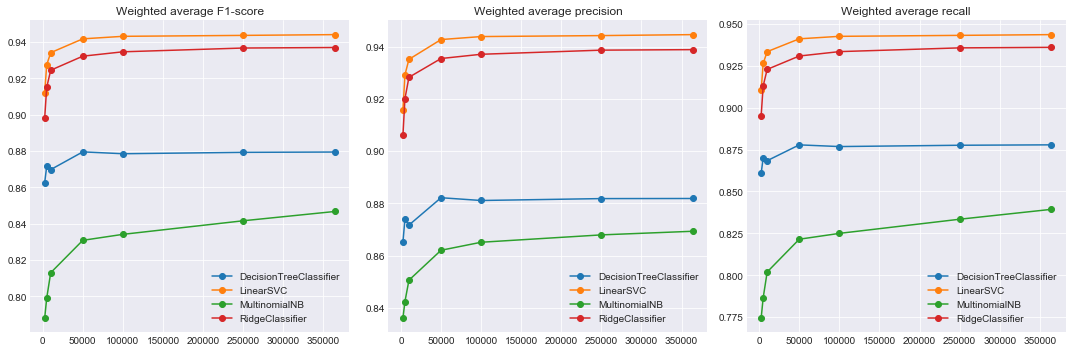

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
for key, grp in results.groupby(['model']):
    axes[0].plot(grp['max_features'], grp['f1'], label=key, marker='o')
    axes[0].set_title('Weighted average F1-score')
    #axes[0].xscale('log')
    axes[0].legend()
    axes[1].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[1].set_title('Weighted average precision')
    #axes[0].xscale('log')
    axes[1].legend()
    axes[2].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[2].set_title('Weighted average recall')
    #axes[0].xscale('log')
    axes[2].legend()
plt.tight_layout()
plt.savefig('output/ML_SMOTE_fake_average.pdf')